# Use of Solitary Confinement at Northwest ICE Processing Center\*
## UW Center for Human Rights preliminary report, November 2019

Data analyzed:

1. Dataset of second installment of SRMS report of solitary confinement placements at NWDC relased to UWCHR via FOIA on August 12, 2020
2. Dataset of national solitary confinement placements in ICE detention analyzed by International Consortium of Investigative Journalists (Spencer Woodman, Karrie Kehoe, Maryam Saleh, and Hannah Rappleye, ["Thousands of Immigrants Suffer In US Solitary Confinement"]((https://www.icij.org/investigations/solitary-voices/thousands-of-immigrants-suffer-in-us-solitary-confinement/)), ICIJ, May 21 2019)
3. Dataset of national solitary confinement placements in ICE detention analyzed by Project on Government Oversight (POGO, ["ISOLATED: ICE Confines Some Detainees with Mental Illness in Solitary for Months"](https://www.pogo.org/investigation/2019/08/isolated-ice-confines-some-detainees-with-mental-illness-in-solitary-for-months/), August 14 2019)

\* This report uses the term "solitary confinement" to describe practices named by ICE and GEO Group as "administrative segregation" or "disciplinary segregation". This report interchangably uses the titles "Northwest ICE Processing Center" (the title currently employed by ICE) and "Northwest Detention Center (NWDC)" (the former title used during the time period covered by this report) to refer to the immigration prison in Tacoma, Washington privately owned and operated by GEO Group on behalf of ICE.

## Dataset Description and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import datetime as dt
import yaml
from pandas.tseries import offsets
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [2]:
csv_opts = {'sep': '|',
            'quotechar': '"',
            'compression': 'gzip',
            'encoding': 'utf-8'}

# df = pd.read_csv('../input/srms-1.csv.gz',
#                  parse_dates=['placement_date', 'release_date'],
#                  **csv_opts)

df = pd.read_csv('../input/srms-2.csv.gz',
                 parse_dates=['placement_date', 'release_date'],
                 **csv_opts)

print(df.info())
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   tracking_number                      461 non-null    object        
 1   gender                               461 non-null    object        
 2   country_of_citizenship               459 non-null    object        
 3   facility_aor                         461 non-null    object        
 4   facility                             461 non-null    object        
 5   facility:detloc                      461 non-null    object        
 6   report_type                          461 non-null    object        
 7   placement_date                       461 non-null    datetime64[ns]
 8   placement_reason                     461 non-null    object        
 9   release_date                         453 non-null    datetime64[ns]
 10  disciplinary_i

,tracking_number,gender,country_of_citizenship,facility_aor,facility,facility:detloc,report_type,placement_date,placement_reason,release_date,...,special_criteria,id,current_review,created,lgbti,custody_classification_level,placement_reason_type,admin_or_disciplinary,detloc,hashid
0,"(b)(6),(b)(7)(c )",Male,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,14 Day,2020-03-16,Facility Security Threat: Other,2020-03-20,...,Yes,"(b)(6), (b)(7)(C), (b)(7)(E)",14.0,3/23/2020,NaN,Medium - High,Facility Security Threat,Administrative,CSCNWWA,c705e41edb544c39905e7414e6711ee9170c977d
1,"(b)(6),(b)(7)(c )",Male,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2020-02-13,Pending Investigation of Disciplinary Violation,2020-03-17,...,No,"(b)(6), (b)(7)(C), (b)(7)(E)",30.0,3/6/2020,NaN,Medium - High,Pending Disciplinary,Administrative,CSCNWWA,8eda88954e554d5e6bde5f713b21fe919ccdb150
2,"(b)(6),(b)(7)(c )",Male,EL SALVADOR,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2020-01-24,Facility Security Threat: Other,2020-03-10,...,No,"(b)(6), (b)(7)(C), (b)(7)(E)",30.0,2/25/2020,NaN,Medium - High,Facility Security Threat,Administrative,CSCNWWA,3218ccddadcf4fa318f49496fefc05cfeac039a8
3,"(b)(6),(b)(7)(c )",Male,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2020-02-21,Facility Security Threat: Other,2020-03-06,...,No,"(b)(6), (b)(7)(C), (b)(7)(E)",30.0,2/24/2020,NaN,Medium - High,Facility Security Threat,Administrative,CSCNWWA,69544b3c78eea42b483741a95777faa6ad5c71e4
4,"(b)(6),(b)(7)(c )",Male,MEXICO,SEA (Seattle),TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,CSCNWWA,30 Day Interval,2020-01-30,Protective Custody: Other Detainee Safety,2020-03-03,...,No,"(b)(6), (b)(7)(C), (b)(7)(E)",30.0,2/24/2020,NaN,Medium - High,Protective Custody,Administrative,CSCNWWA,89b9971314b42d84f5def1102f4ba8cf080af1d7


`tracking_number` redacted, no other unique identifer present in original version of SRMS second installment. 

We use generated `hashid` field as unique identifier for each record.

The following code section checks checks that no solitary record release date precedes placement date; and prints some basic characteristics of the dataset:

In [3]:
assert len(df[df['release_date'] < df['placement_date']]) == 0
# assert len(df) == len(set(df['tracking_number'])) # Tracking numbers redacted in second installment of SRMS
assert len(df) == len(set(df['hashid']))
assert(sum(pd.isnull(df['hashid']))) == 0
assert(sum(pd.isnull(df['tracking_number']))) == 0
print(f'{len(df)} total unique records.')
print()
print(f'Earliest placement date: {df.placement_date.min()}')
print(f'Latest placement date: {df.placement_date.max()}')
print()
print(f'Earliest release date: {df.release_date.min()}')
print(f'Latest release date: {df.release_date.max()}')
print()
print('Solitary pop. countries of citizenship (Top 10):')
print(df['country_of_citizenship'].value_counts(dropna=False).head(10))
print()
print('Solitary population by gender:')
print(df['gender'].value_counts(dropna=False).head(10))

461 total unique records.

Earliest placement date: 2013-09-03 00:00:00
Latest placement date: 2020-03-16 00:00:00

Earliest release date: 2013-10-03 00:00:00
Latest release date: 2020-03-20 00:00:00

Solitary pop. countries of citizenship (Top 10):
MEXICO         227
CANADA          24
EL SALVADOR     19
UKRAINE         17
SOMALIA         17
HONDURAS        16
GUATEMALA       13
RUSSIA           9
ARGENTINA        7
ETHIOPIA         7
Name: country_of_citizenship, dtype: int64

Solitary population by gender:
Male      423
Female     38
Name: gender, dtype: int64


In [13]:
dhs_cited = len(df.set_index('placement_date').loc['2013-06-01':'2014-06-30'])

In [19]:
dhs_cited

78

In [16]:
top_10 = pd.DataFrame(df['country_of_citizenship'].value_counts(dropna=False).head(10))

In [17]:
all_others = df[~df['country_of_citizenship'].isin(list(top_10.index))]

In [18]:
top_10.loc['ALL OTHERS', 'country_of_citizenship'] = len(all_others)

In [19]:
print(top_10)

             country_of_citizenship
MEXICO                        227.0
CANADA                         24.0
EL SALVADOR                    19.0
SOMALIA                        17.0
UKRAINE                        17.0
HONDURAS                       16.0
GUATEMALA                      13.0
RUSSIA                          9.0
ARGENTINA                       7.0
ETHIOPIA                        7.0
ALL OTHERS                    105.0


Total solitary placements per calendar year:

In [20]:
g_annual = df.set_index('placement_date').groupby(pd.Grouper(freq='AS'))
g_annual['tracking_number'].count()

placement_date
2013-01-01     37
2014-01-01     69
2015-01-01     66
2016-01-01     38
2017-01-01     66
2018-01-01    100
2019-01-01     75
2020-01-01     10
Freq: AS-JAN, Name: tracking_number, dtype: int64

Total solitary placements per fiscal year:

In [21]:
g_fy = df.set_index('placement_date').groupby(pd.Grouper(freq='AS-OCT'))
g_fy['tracking_number'].count()

placement_date
2012-10-01     5
2013-10-01    83
2014-10-01    63
2015-10-01    50
2016-10-01    54
2017-10-01    95
2018-10-01    89
2019-10-01    22
Freq: AS-OCT, Name: tracking_number, dtype: int64

Average monthly solitary placements per year:

In [22]:
g_monthly = df.set_index('placement_date').groupby(pd.Grouper(freq='MS'))
g_monthly['tracking_number'].count().resample('AS').mean()

placement_date
2013-01-01    9.250000
2014-01-01    5.750000
2015-01-01    5.500000
2016-01-01    3.166667
2017-01-01    5.500000
2018-01-01    8.333333
2019-01-01    6.250000
2020-01-01    3.333333
Freq: AS-JAN, Name: tracking_number, dtype: float64

The following code section generates a visualization of the number of solitary confinement placements per month for the time period covered by the dataset:

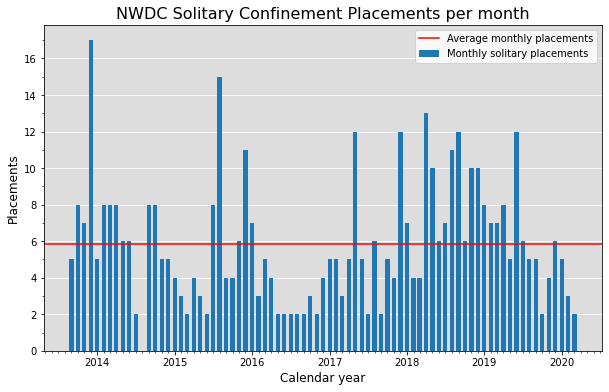

Minimum monthly solitary placements: 0
Maximum monthly solitary placements: 17 in December 2013
Overall average monthly solitary placements: 5.8354430379746836


In [23]:
data = g_monthly['tracking_number'].count()

years_loc = mdates.YearLocator()
months_loc = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')
ax.bar(data.index, data, width=20)
ax.xaxis.set_minor_locator(months_loc)
ax.xaxis.set_major_locator(years_loc)
ax.xaxis.set_major_formatter(years_fmt)
ax.axhline(data.mean(), color='r')
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.title('NWDC Solitary Confinement Placements per month', fontsize=16)
plt.ylabel('Placements', fontsize=12)
plt.xlabel('Calendar year', fontsize=12)
plt.legend(('Average monthly placements', 'Monthly solitary placements'), loc='upper right')

plt.show()

print(f'Minimum monthly solitary placements: {data.min()}')
print(f'Maximum monthly solitary placements: {data.max()} in {data.idxmax().month_name()} {data.idxmax().year}')
print(f'Overall average monthly solitary placements: {data.mean()}')

In [24]:
data = df.set_index('placement_date').groupby([pd.Grouper(freq='Q-OCT')])['placement_reason_type'].value_counts().unstack()
data.index = [f'{x.year} Q{x.quarter}' for x in data.index]

In [25]:
data = data[['Disciplinary',
            'Pending Disciplinary',
            'Protective Custody',
            'Facility Security Threat',
            'Hunger Strike',
            'Medical',
            'Mental Illness',
            'Other']]

In [26]:
# reds = cm.Reds(128)
# blues = cm.Blues(range(0,256,32))
# colors = np.vstack([reds, blues])

In [27]:
# colors = ['#FF0000','#00FF00', '#00EE00', '#00DD00', '#00CC00', '#00BB00', '#00AA00', '#008800']

In [28]:
# # To convert data to proportional
# totals = data.sum(axis=1).to_list()
# for col in data.columns:
#     data[col] = [i / j * 100 for i,j in zip(data[col], totals)]

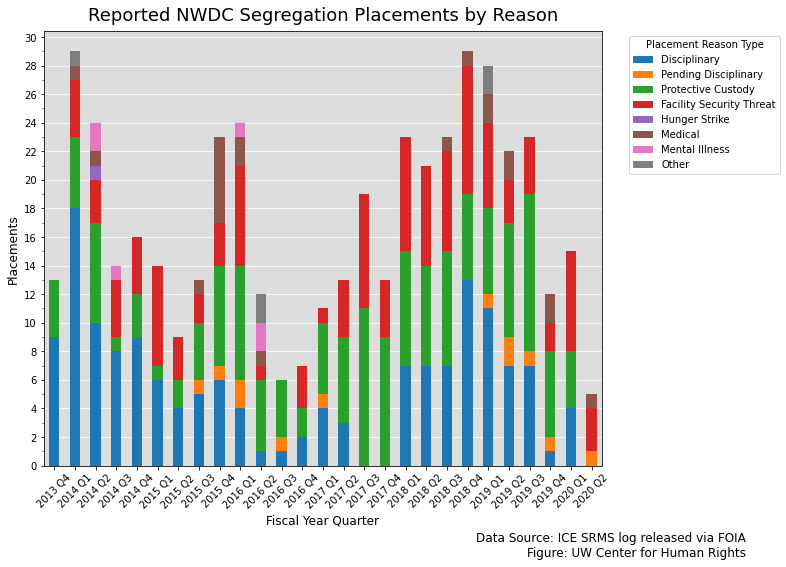

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

p1 = data.plot(kind='bar', ax=ax, stacked=True, figsize=(10,8), color=cm.tab10(range(0,8,1)))
# p1 = data.plot(kind='bar', ax=ax, stacked=True, figsize=(10,8), edgecolor='#000000', color=colors)

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.xticks(rotation=45)

plt.title('Reported NWDC Segregation Placements by Reason', fontsize=18, pad=10)
plt.ylabel('Placements', fontsize=12)
plt.xlabel('Fiscal Year Quarter', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Placement Reason Type')

txt='Data Source: ICE SRMS log released via FOIA\nFigure: UW Center for Human Rights'
plt.figtext(1.1, -.03, txt, wrap=True, horizontalalignment='right', fontsize=12)

plt.show();

In [30]:
data = df.set_index('placement_date').groupby([pd.Grouper(freq='Q-OCT')])['admin_or_disciplinary'].value_counts().unstack()
data.index = [f'{x.year} Q{x.quarter}' for x in data.index]

In [31]:
data = data.fillna(0)

In [32]:
# # To convert data to proportional
totals = data.sum(axis=1).to_list()
for col in data.columns:
    data[col] = [i / j * 100 for i,j in zip(data[col], totals)]

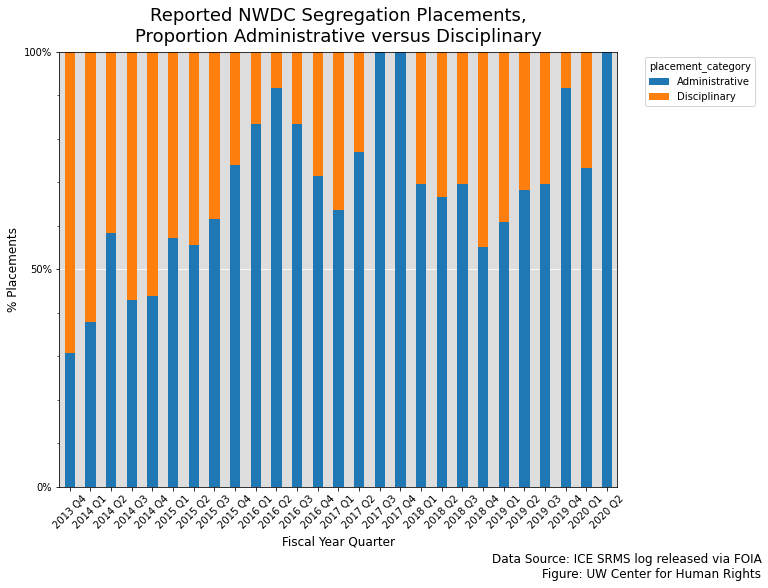

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

p1 = data.plot(kind='bar', ax=ax, stacked=True, figsize=(10,8), color=cm.tab10(range(0,8,1)))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')

ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)

plt.title('Reported NWDC Segregation Placements,\nProportion Administrative versus Disciplinary', fontsize=18, pad=10)
# plt.title('Reported NWDC Segregation Placements', fontsize=18, pad=10)
plt.ylim(0, 100)
plt.ylabel('% Placements', fontsize=12)
# plt.ylabel('Placements', fontsize=12)
plt.xlabel('Fiscal Year Quarter', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='placement_category')

txt='Data Source: ICE SRMS log released via FOIA\nFigure: UW Center for Human Rights'
plt.figtext(1.1, -.03, txt, wrap=True, horizontalalignment='right', fontsize=12)

plt.show();

In [34]:
df['mental_illness'].unique()

array(['Serious Mental Illness', 'None', 'Mental Illness', nan],
      dtype=object)

In [35]:
df['mental_illness'] = df['mental_illness'].fillna('None')

In [36]:
data = df.set_index('placement_date').groupby([pd.Grouper(freq='Q-OCT')])['mental_illness'].value_counts(dropna=False).unstack()
data.index = [f'{x.year} Q{x.quarter}' for x in data.index]

In [37]:
data = data[['Mental Illness', 'Serious Mental Illness', 'None']]

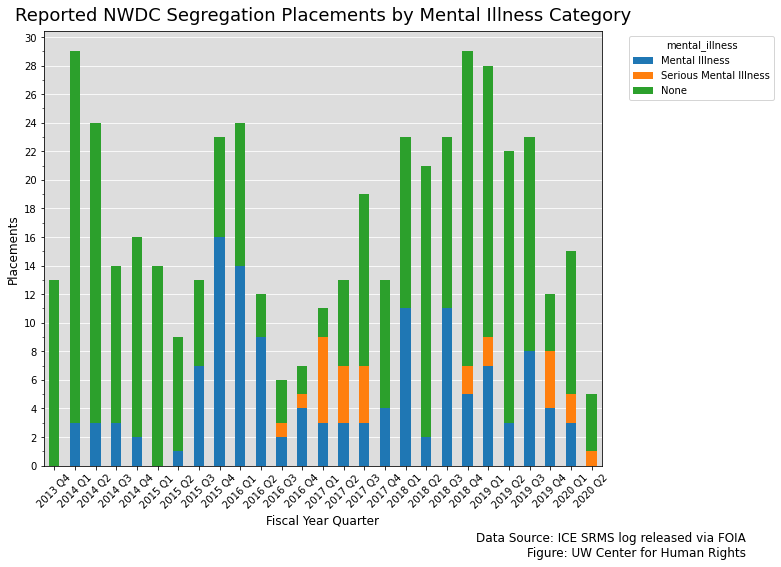

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

data.plot(kind='bar', ax=ax, stacked=True, figsize=(10,8), color=cm.tab10(range(0,8,1)))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')

ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.xticks(rotation=45)

plt.title('Reported NWDC Segregation Placements by Mental Illness Category', fontsize=18, pad=10)
plt.ylabel('Placements', fontsize=12)
plt.xlabel('Fiscal Year Quarter', fontsize=12)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='mental_illness')
txt='Data Source: ICE SRMS log released via FOIA\nFigure: UW Center for Human Rights'
plt.figtext(1.1, -.03, txt, wrap=True, horizontalalignment='right', fontsize=12)

plt.show();

In [39]:
df['mental_illness'].value_counts(dropna=False, normalize=True)

None                      0.657267
Mental Illness            0.284165
Serious Mental Illness    0.058568
Name: mental_illness, dtype: float64

### Calculating time in solitary confinement

We see in the following code section that several records do not have an "Release Date" specified. All of these records are segregation placements beginning during the latter portion of the dataset, which suggests that these refer to individuals who remained in solitary confinement at the time of production of this dataset.

In [40]:
null_start = df['placement_date'].isnull()
assert sum(null_start) == 0
null_end = df['release_date'].isnull()
print('No missing placement dates.')
print(f'{sum(null_end)} records with missing release dates.')
print()
print('Description of "Placement Date" for records with no "Release Date":')
print(df[null_end]['placement_date'].describe())
print()

No missing placement dates.
8 records with missing release dates.

Description of "Placement Date" for records with no "Release Date":
count                       8
unique                      7
top       2020-01-26 00:00:00
freq                        2
first     2018-07-27 00:00:00
last      2020-03-02 00:00:00
Name: placement_date, dtype: object



For purposes of analysis, we drop uncompleted placements.

In [41]:
pre = len(df)

In [42]:
df = df[pd.notnull(df['release_date'])]

In [43]:
post = len(df)

In [44]:
print(f'{pre - post} uncompleted placements dropped.')

8 uncompleted placements dropped.


In [45]:
df['solitary_length'] = df['release_date'] - df['placement_date']

In [46]:
df['days_solitary'] = df['solitary_length'] / np.timedelta64(1, 'D')
df.loc[:, 'log_days_solitary'] = np.log(df['days_solitary'])

In [47]:
# Testing that no solitary placement has negative stay length
assert sum(df['days_solitary'] < 0) == 0

A histogram of solitary placement lengths shows that the vast majority of placement are less than 50 days, but the distribution has a wide distribution.

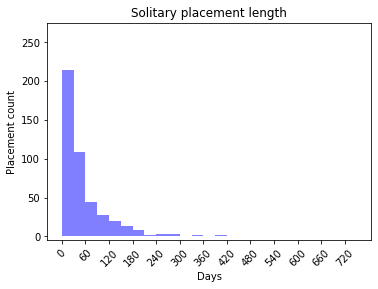

In [48]:
num_bins = np.arange(0,780,30)
data = df['days_solitary']
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
 
plt.plot()
plt.xlabel('Days')
plt.xticks(np.arange(0, 780, step=60), rotation=45)
plt.ylabel('Placement count')
plt.yticks(np.arange(0, 300, step=50))
plt.ylim(-5, 275)
plt.title('Solitary placement length')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15) 
# plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.show()

In [49]:
sum(df['days_solitary'] > 75)

101

In [50]:
sum(df['days_solitary'] > 15)

382

In [51]:
sum(df['days_solitary'] > 15) / len(df['days_solitary'])

0.8432671081677704

In [52]:
sum(df['days_solitary'] > 30)

230

In [53]:
sum(df['days_solitary'] > 30) / len(df)

0.5077262693156733

In [54]:
round(sum(df['days_solitary'] <= 30) / len(df) * 100, 2)

49.23

We can plot length of solitary stay by date of placement. Note that as we might expect, the longest placement falls early in the timeline; as noted above some placements were apparently ongoing at the time of release of this data, and we represent the minimum amount of solitary time (orange points):

/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


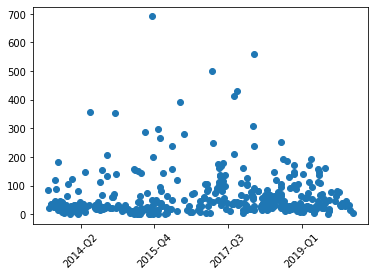

In [55]:
x=df[~null_end].loc[:, 'placement_date'].astype(int)
y=df[~null_end].loc[:,'days_solitary']

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x, y)

x=df[null_end].loc[:, 'placement_date'].astype(int)
y=df[null_end].loc[:,'days_solitary']
plt.scatter(x, y)

xticks = ax.get_xticks()
xticks_dates = [str(f'{pd.to_datetime(x).year}-Q{pd.to_datetime(x).quarter}') for x in xticks]
ax.set_xticklabels(xticks_dates,  rotation=45)
plt.show()
plt.close(fig=fig)
del fig, ax

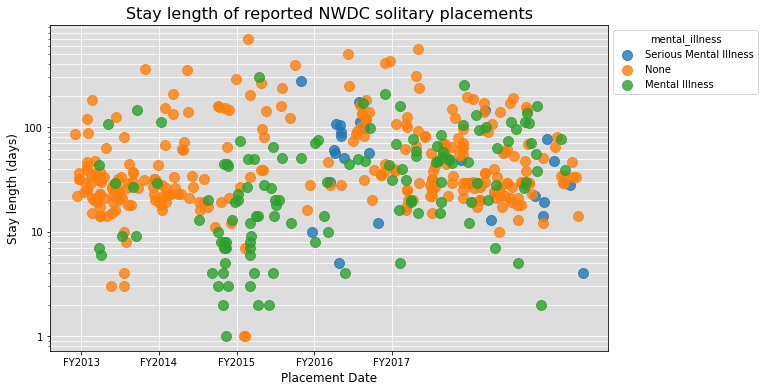

In [56]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF', which='both')
ax.xaxis.grid(color='#FFFFFF')

to_plot = 'mental_illness'
values = df[to_plot].unique()

for v in values:
    data = df[df[to_plot] == v]
    x=data.loc[:, 'placement_date'].astype(int)
    y=data.loc[:,'days_solitary']
    plt.scatter(x, y, s=100, alpha=.8)

plt.xticks(pd.date_range(start='2013-01-01', end='2018-01-01', freq='AS-OCT').astype(int))
xticks = ax.get_xticks()
xticks_dates = [str(f'FY{pd.to_datetime(x).year}') for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.xlabel('Placement Date', fontsize=12)

plt.yscale('log')
plt.ylabel('Stay length (days)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())

# x_min = xticks.min()-10000000000000000
# x_max = xticks.max()+10000000000000000
# ax.hlines(14, xmin=x_min, xmax=x_max, linestyles='dashed')

plt.legend(values, title=to_plot, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Stay length of reported NWDC solitary placements', fontsize=16)
plt.show()
plt.close(fig=fig)
del fig, ax

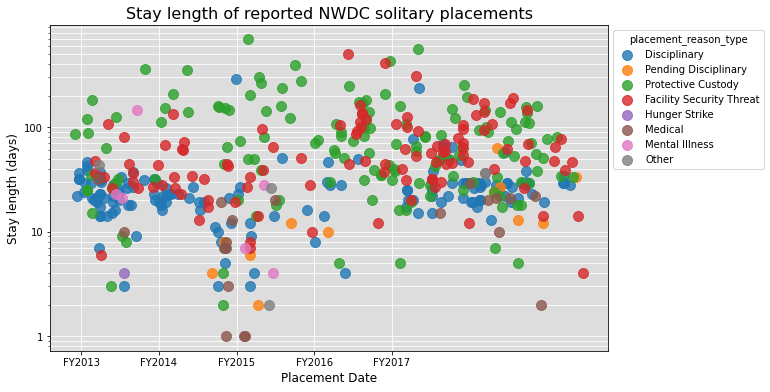

In [57]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF', which='both')
ax.xaxis.grid(color='#FFFFFF')

to_plot = 'placement_reason_type'
# values = df[to_plot].unique()
values = ['Disciplinary',
        'Pending Disciplinary',
        'Protective Custody',
        'Facility Security Threat',
        'Hunger Strike',
        'Medical',
        'Mental Illness',
        'Other']

for v in values:
    data = df[df[to_plot] == v]
    x=data.loc[:, 'placement_date'].astype(int)
    y=data.loc[:,'days_solitary']
    plt.scatter(x, y, s=100, alpha=.8)

plt.xticks(pd.date_range(start='2013-01-01', end='2018-01-01', freq='AS-OCT').astype(int))
xticks = ax.get_xticks()
xticks_dates = [str(f'FY{pd.to_datetime(x).year}') for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.xlabel('Placement Date', fontsize=12)

plt.yscale('log')
plt.ylabel('Stay length (days)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
# yticks = ax.get_yticks()
# yticks = np.append(yticks, np.array([14, 30]))
# ax.set_yticklabels(yticks)

plt.legend(values, title=to_plot, loc='upper left', bbox_to_anchor=(1, 1))

# ax.axhline(14, color='#000000', linestyle='dashed')
# ax.axhline(30, color='#000000', linestyle='dashed')

plt.title('Stay length of reported NWDC solitary placements', fontsize=16)
plt.show()
plt.close(fig=fig)
del fig, ax

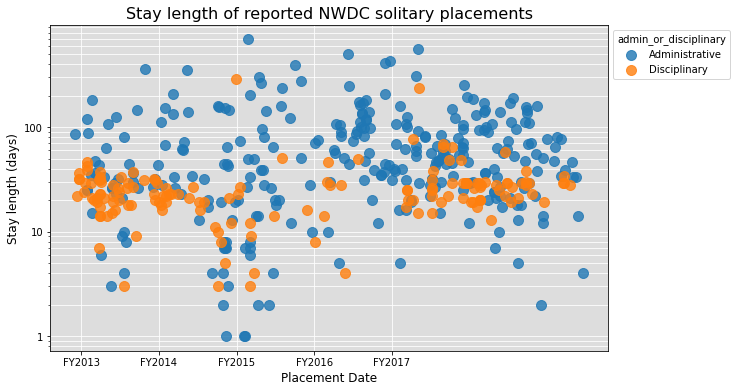

In [58]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF', which='both')
ax.xaxis.grid(color='#FFFFFF')

to_plot = 'admin_or_disciplinary'
values = df[to_plot].unique()

for v in values:
    data = df[df[to_plot] == v]
    x=data.loc[:, 'placement_date'].astype(int)
    y=data.loc[:,'days_solitary']
    plt.scatter(x, y, s=100, alpha=.8)

plt.xticks(pd.date_range(start='2013-01-01', end='2018-01-01', freq='AS-OCT').astype(int))
xticks = ax.get_xticks()
xticks_dates = [str(f'FY{pd.to_datetime(x).year}') for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.xlabel('Placement Date', fontsize=12)

plt.yscale('log')
plt.ylabel('Stay length (days)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
# yticks = ax.get_yticks()
# yticks = np.append(yticks, np.array([14, 30]))
# ax.set_yticklabels(yticks)

plt.legend(values, title=to_plot, loc='upper left', bbox_to_anchor=(1, 1))

# ax.axhline(14, color='#000000', linestyle='dashed')
# ax.axhline(30, color='#000000', linestyle='dashed')

plt.title('Stay length of reported NWDC solitary placements', fontsize=16)
plt.show()
plt.close(fig=fig)
del fig, ax

In [59]:
df['attorney_notification'].value_counts(dropna=False)

No     384
Yes     35
NaN     34
Name: attorney_notification, dtype: int64

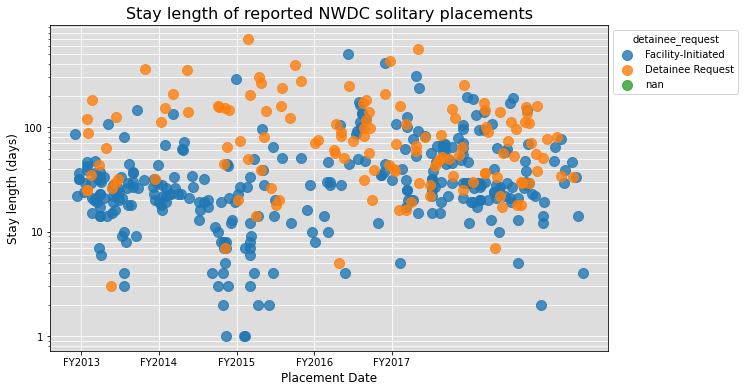

In [60]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF', which='both')
ax.xaxis.grid(color='#FFFFFF')

to_plot = 'detainee_request'
values = df[to_plot].unique()

for v in values:
    data = df[df[to_plot] == v]
    x=data.loc[:, 'placement_date'].astype(int)
    y=data.loc[:,'days_solitary']
    plt.scatter(x, y, s=100, alpha=.8)

plt.xticks(pd.date_range(start='2013-01-01', end='2018-01-01', freq='AS-OCT').astype(int))
xticks = ax.get_xticks()
xticks_dates = [str(f'FY{pd.to_datetime(x).year}') for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.xlabel('Placement Date', fontsize=12)

plt.yscale('log')
plt.ylabel('Stay length (days)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
# yticks = ax.get_yticks()
# yticks = np.append(yticks, np.array([14, 30]))
# ax.set_yticklabels(yticks)

plt.legend(values, title=to_plot, loc='upper left', bbox_to_anchor=(1, 1))

# ax.axhline(14, color='#000000', linestyle='dashed')
# ax.axhline(30, color='#000000', linestyle='dashed')

plt.title('Stay length of reported NWDC solitary placements', fontsize=16)
plt.show()
plt.close(fig=fig)
del fig, ax

Values vary greatly, and the average solitary placement length is much lower than the maximum, so we can use a log transformation to get a better idea of distribution. These rough visualizations of trend in solitary stay length over time suggest a slight apparent increase. More statistically rigorous work would be needed to explore whether this trend is significant.

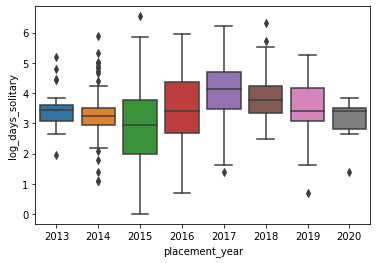

In [61]:
df['placement_year'] = df['placement_date'].map(lambda x: x.year)
ax = sns.boxplot(data=df, x="placement_year", y="log_days_solitary")

Solitary placement length by gender:

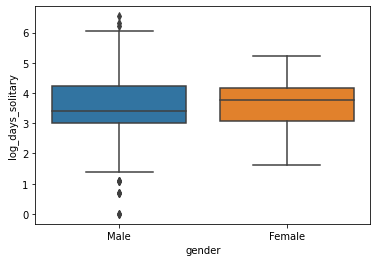

In [62]:
ax = sns.boxplot(data=df, x="gender", y="log_days_solitary")

Solitary length for nationalities with > 5 placements:

In [63]:
coc_count = df['country_of_citizenship'].value_counts()
coc_list = list(coc_count[coc_count > 1].index)
mask = df['country_of_citizenship'].isin(coc_list)

In [64]:
order = df[mask].groupby(by=["country_of_citizenship"])["log_days_solitary"].median().sort_values(ascending=False).index

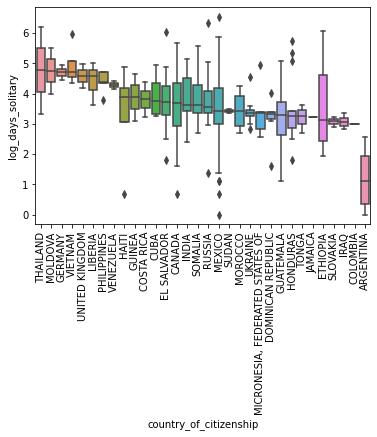

In [65]:
ax = sns.boxplot(data=df[mask], x="country_of_citizenship", y="log_days_solitary", order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Solitary placements coded as detainee requested tend to be longer than facility-iniated placements:

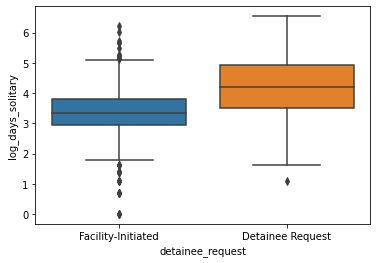

In [66]:
ax = sns.boxplot(data=df, x="detainee_request", y="log_days_solitary")
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

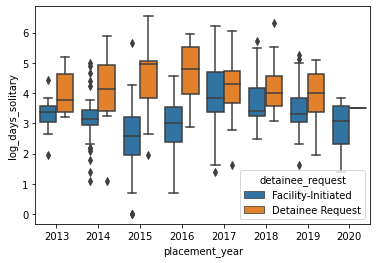

In [67]:
sns.boxplot(x='placement_year',y='log_days_solitary',data=df,hue='detainee_request')

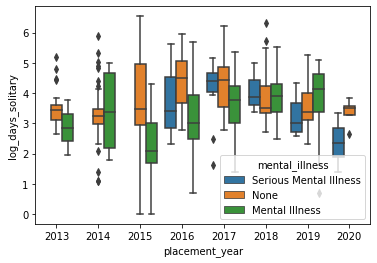

In [68]:
sns.boxplot(x='placement_year',y='log_days_solitary',data=df,hue='mental_illness')

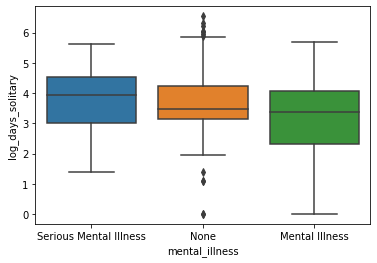

In [69]:
sns.boxplot(x='mental_illness',y='log_days_solitary',data=df)

In [70]:
df.set_index('placement_date').groupby(['mental_illness'])['days_solitary'].describe()

,count,mean,std,min,25%,50%,75%,max
mental_illness,,,,,,,,
Mental Illness,129.0,44.984496,50.337918,1.0,10.0,29.0,58.0,299.0
None,297.0,65.094276,86.588990,1.0,23.0,32.0,69.0,691.0
Serious Mental Illness,27.0,65.814815,61.900688,4.0,20.5,51.0,94.0,279.0


In [71]:
sum(df[df['placement_reason'] == 'Mental Illness']['mental_illness'] == 'None')

3

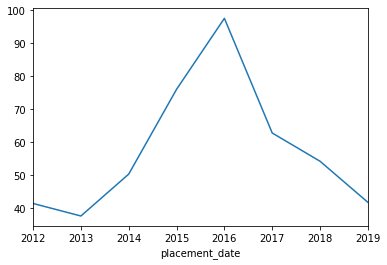

In [72]:
df.set_index('placement_date').groupby([pd.Grouper(freq='AS-OCT')])['days_solitary'].describe()['mean'].plot()

In [73]:
df['mental_illness'].unique()

array(['Serious Mental Illness', 'None', 'Mental Illness'], dtype=object)

In [74]:
df['mental_illness_bool'] = df['mental_illness'].replace({'Mental Illness': True, 'None': False, 'Serious Mental Illness': True})

In [75]:
df.groupby(['placement_reason_type'])['days_solitary'].describe()

,count,mean,std,min,25%,50%,75%,max
placement_reason_type,,,,,,,,
Disciplinary,154.0,28.337662,29.706675,3.0,19.0,24.5,29.00,288.0
Facility Security Threat,109.0,70.770642,72.334054,4.0,31.0,47.0,92.00,499.0
Hunger Strike,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
Medical,20.0,13.100000,9.547113,1.0,6.0,11.5,20.25,32.0
Mental Illness,6.0,38.333333,54.057994,4.0,10.5,22.0,26.75,147.0
Other,5.0,28.600000,16.056151,2.0,26.0,36.0,36.00,43.0
Pending Disciplinary,12.0,17.833333,17.119013,2.0,7.5,12.0,24.75,63.0
Protective Custody,146.0,95.767123,102.730316,2.0,31.0,64.0,124.00,691.0


In [76]:
df.groupby(['placement_reason_type', 'mental_illness_bool'])['days_solitary'].describe()

count        mean         std  \
placement_reason_type    mental_illness_bool                                  
Disciplinary             False                122.0   30.098361   31.985381   
                         True                  32.0   21.625000   17.422177   
Facility Security Threat False                 71.0   85.521127   82.852685   
                         True                  38.0   43.210526   32.981697   
Hunger Strike            False                  1.0    4.000000         NaN   
Medical                  False                  8.0   14.375000   10.795998   
                         True                  12.0   12.250000    9.016399   
Mental Illness           False                  3.0   17.000000    8.717798   
                         True                   3.0   59.666667   76.578935   
Other                    False                  2.0   36.000000    0.000000   
                         True                   3.0   23.666667   20.599353   
Pending Disciplinary     False                  5.0   21.800000    9.093954   
                         True                   7.0   15.000000   21.439838   
Protective Custody       False                 85.0  108.682353  121.049302   
                         True                  61.0   77.770492   66.518016   

                                               min    25%   50%    75%    max  
placement_reason_type    mental_illness_bool                                   
Disciplinary             False                 3.0  20.00  25.5   29.0  288.0  
                         True                  3.0   8.75  17.0   29.0   77.0  
Facility Security Threat False                14.0  35.00  62.0  101.0  499.0  
                         True                  4.0  15.25  41.0   52.5  130.0  
Hunger Strike            False                 4.0   4.00   4.0    4.0    4.0  
Medical                  False                 1.0   7.75  14.5   21.0   32.0  
                         True                  1.0   6.00  10.5   20.0   29.0  
Mental Illness           False                 7.0  14.00  21.0   22.0   23.0  
                         True                  4.0  16.00  28.0   87.5  147.0  
Other                    False                36.0  36.00  36.0   36.0   36.0  
                         True                  2.0  14.00  26.0   34.5   43.0  
Pending Disciplinary     False                12.0  13.00  24.0   27.0   33.0  
                         True                  2.0   5.00   8.0   11.0   63.0  
Protective Custody       False                 3.0  32.00  64.0  146.0  691.0  
                         True                  2.0  30.00  61.0  101.0  299.0

In [77]:
df.groupby(['mental_illness_bool'])['days_solitary'].describe()

,count,mean,std,min,25%,50%,75%,max
mental_illness_bool,,,,,,,,
False,297.0,65.094276,86.588990,1.0,23.0,32.0,69.00,691.0
True,156.0,48.589744,52.893792,1.0,12.0,30.0,65.25,299.0


In [78]:
df['mental_illness_bool'].value_counts(normalize=True)

False    0.655629
True     0.344371
Name: mental_illness_bool, dtype: float64

In [79]:
df['mental_illness_bool'].value_counts()

False    297
True     156
Name: mental_illness_bool, dtype: int64

In [80]:
df['placement_reason'].value_counts(dropna=False)

Disciplinary                                                             154
Protective Custody: Other Detainee Safety                                115
Facility Security Threat: Other                                           53
Facility Security Threat: Violent or Disruptive Behavior                  33
Facility Security Threat: Gang Member Status (Not Protective Custody)     21
Protective Custody: Gang Status (Protective Custody Only)                 19
Medical: Observation                                                      14
Pending Investigation of Disciplinary Violation                           12
Protective Custody: Criminal Offense (i.e. Sex Offender)                   6
Mental Illness                                                             6
Other                                                                      5
Medical: Other                                                             4
Protective Custody: Special Vulnerability Other                            3

In [81]:
df[df['mental_illness_bool'] == True]['placement_reason'].value_counts(dropna=False, normalize=True)

Protective Custody: Other Detainee Safety                                0.326923
Disciplinary                                                             0.205128
Facility Security Threat: Other                                          0.134615
Facility Security Threat: Violent or Disruptive Behavior                 0.096154
Medical: Observation                                                     0.057692
Pending Investigation of Disciplinary Violation                          0.044872
Protective Custody: Gang Status (Protective Custody Only)                0.032051
Other                                                                    0.019231
Protective Custody: Special Vulnerability Other                          0.019231
Mental Illness                                                           0.019231
Facility Security Threat: Gang Member Status (Not Protective Custody)    0.012821
Medical: Other                                                           0.012821
Medical: Other I

In [82]:
df[df['mental_illness_bool'] == True]['placement_reason'].value_counts(dropna=False)

Protective Custody: Other Detainee Safety                                51
Disciplinary                                                             32
Facility Security Threat: Other                                          21
Facility Security Threat: Violent or Disruptive Behavior                 15
Medical: Observation                                                      9
Pending Investigation of Disciplinary Violation                           7
Protective Custody: Gang Status (Protective Custody Only)                 5
Other                                                                     3
Protective Custody: Special Vulnerability Other                           3
Mental Illness                                                            3
Facility Security Threat: Gang Member Status (Not Protective Custody)     2
Medical: Other                                                            2
Medical: Other Infectious Disease                                         1
Protective C

In [83]:
df['mental_illness'].value_counts()

None                      297
Mental Illness            129
Serious Mental Illness     27
Name: mental_illness, dtype: int64

In [84]:
df['ever_smi'].value_counts()

No     427
Yes     26
Name: ever_smi, dtype: int64

In [85]:
df[df['mental_illness'] == 'Serious Mental Illness']['days_solitary'].mean()

65.81481481481481

In [86]:
df[df['mental_illness'] == 'Serious Mental Illness']['placement_reason'].value_counts()

Protective Custody: Other Detainee Safety                    11
Disciplinary                                                  4
Facility Security Threat: Other                               4
Facility Security Threat: Violent or Disruptive Behavior      3
Medical: Observation                                          2
Protective Custody: Gang Status (Protective Custody Only)     2
Protective Custody: Special Vulnerability Other               1
Name: placement_reason, dtype: int64

In [87]:
df[df['mental_illness'] == 'Serious Mental Illness']['country_of_citizenship'].value_counts()

MEXICO                             18
DOMINICAN REPUBLIC                  2
EL SALVADOR                         1
HAITI                               1
VIETNAM                             1
ROMANIA                             1
MICRONESIA, FEDERATED STATES OF     1
GAMBIA                              1
Name: country_of_citizenship, dtype: int64

## National solitary confinement datasets

### ICIJ

See: ["Solitary Voices: Thousands of Immigrants Suffer In US Solitary Confinement"](https://www.icij.org/investigations/solitary-voices/thousands-of-immigrants-suffer-in-us-solitary-confinement/) by Spencer Woodman Karrie Kehoe Maryam Saleh Hannah Rappleye, International Consortium of Investigative Journalists, May 21, 2019 

See notebook `icij.ipynb` for writeup on apparent issues with `placement_date` and `release_date` values in the published version of this dataset. Correcting for this issue shows that ICIJ and UWCHR's respective datasets for NWDC solitary confinement placements are very similar, though some discrepancies remain.

### POGO

See: POGO, ["ISOLATED: ICE Confines Some Detainees with Mental Illness in Solitary for Months"](https://www.pogo.org/investigation/2019/08/isolated-ice-confines-some-detainees-with-mental-illness-in-solitary-for-months/), August 14 2019

See notebook `pogo.ipynb` for descriptive analysis of POGO dataset including comparison with UWCHR records. Records published by POGO match recods released to UWCHR.

In [88]:
icij = pd.read_csv('../input/icij.csv.gz',
                   parse_dates=['placement_date', 'release_date'],
                   **csv_opts)

# icij = pd.read_csv('../frozen/icij-date-fix-temp.csv',
#                    parse_dates=['placement_date',
#                                 'release_date',
#                                 'placement_date_fixed',
#                                 'release_date_fixed'],
#                    **csv_opts)

pogo = pd.read_csv('../input/pogo.csv.gz',
                   parse_dates=['placement_date', 'release_date'],
                   **csv_opts)

In [89]:
print(icij.info())
print()
icij.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8488 entries, 0 to 8487
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   record_id              8488 non-null   int64         
 1   citizenship            8488 non-null   object        
 2   citizenship_id         8488 non-null   object        
 3   facility_aor           8487 non-null   object        
 4   state                  8488 non-null   object        
 5   facility               8488 non-null   object        
 6   facility_id            8488 non-null   object        
 7   placement_date         8488 non-null   datetime64[ns]
 8   year                   8488 non-null   int64         
 9   placement_reason       8488 non-null   object        
 10  placement_reason_raw   8488 non-null   object        
 11  release_date           8293 non-null   datetime64[ns]
 12  days_solitary          8293 non-null   float64       
 13  men

,record_id,citizenship,citizenship_id,facility_aor,state,facility,facility_id,placement_date,year,placement_reason,placement_reason_raw,release_date,days_solitary,mental_illness,no_suicide_watch,placement_reason_type,admin_or_disciplinary,detloc,hashid
0,1,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,2012-04-30,2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,2013-06-27,423.0,no,no,Protective Custody,Administrative,EAZ,fefc562261df068982f366be7f211aabf930be73
1,2,Sierra Leone,sierra_leone,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,2012-05-30,2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,2013-10-30,518.0,no,no,Protective Custody,Administrative,HENDENV,6f78f3e142e84233fa7702f44139d2f61696425c
2,3,El Salvador,el_salvador,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,2012-07-12,2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,2013-03-07,208.0,no,no,Protective Custody,Administrative,HENDENV,3c5f04169d6a35fc90337dc4f09e63c7c8d378eb
3,4,Iraq,iraq,SND (San Diego),CA,CA - San Diego Contract Detention Facility - C...,san_diego_contract_detention_facility_cca_otay_ca,2012-07-25,2012,Mental Illness,mental_illness,2013-11-13,476.0,yes,no,Mental Illness,Administrative,CCASDCA,45a202e98fda07a320c1a66fc9c03d9d24eb284b
4,5,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,2012-08-17,2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,2013-08-11,448.0,no,no,Protective Custody,Administrative,EAZ,b2e862b1b89ebc254b82b398ea2cc95fb38511dd


In [90]:
icij['facility'] = icij['facility'].str.strip()

In [91]:
adelanto = icij[icij['facility'] == 'CA - Adelanto Correctional Facility']

In [92]:
icij_nwdc_str = icij[icij['state'] == 'WA']['facility'].unique()[0]

In [93]:
icij_nwdc_str

'WA - Northwest Detention Center'

In [94]:
icij_nwdc = icij[icij['facility'] == icij_nwdc_str]

In [95]:
icij_nwdc_count = len(icij_nwdc)
icij_nwdc_max_date = icij_nwdc['placement_date'].max()
icij_nwdc_min_date = icij_nwdc['placement_date'].min()
print(icij_nwdc_min_date, icij_nwdc_max_date)

2013-03-06 00:00:00 2017-10-01 00:00:00


In [96]:
print(pogo.info())
print()
pogo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   gender                     6558 non-null   object        
 1   facility_aor               6558 non-null   object        
 2   facility                   6558 non-null   object        
 3   report_type                6558 non-null   object        
 4   placement_date             6558 non-null   datetime64[ns]
 5   placement_reason           6558 non-null   object        
 6   release_date               6438 non-null   datetime64[ns]
 7   disciplinary_infraction    3066 non-null   object        
 8   detailed_reason            901 non-null    object        
 9   attorney_of_record         5818 non-null   object        
 10  attorney_notification      5819 non-null   object        
 11  detainee_request           6558 non-null   object        
 12  compli

,gender,facility_aor,facility,report_type,placement_date,placement_reason,release_date,disciplinary_infraction,detailed_reason,attorney_of_record,...,serious_medical_illness,serious_disability,smi_spi_dis_description,fo_recommendation,created,days_solitary,placement_reason_type,admin_or_disciplinary,detloc,hashid
0,Male,BUF (Buffalo),BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY),30 Day Interval,2016-03-04,Protective Custody: Other Detainee Safety,2018-05-03,NaN,NaN,No,...,No,No,NaN,SHU,3/18/2016 6:18,790.0,Protective Custody,Administrative,BTV,f4801ba8bfb120df08858eb286387547cb5301da
1,Male,DET (Detroit),SENECA COUNTY JAIL (OH),30 Day Interval,2016-05-26,Protective Custody: Criminal Offense (i.e. Sex...,2018-01-03,NaN,Detainee continues to demonstrate inability to...,No,...,No,No,NaN,FO concurs with placement. There have been no...,6/27/2016 12:24,587.0,Protective Custody,Administrative,SENECOH,bf1a7584efdd058585f05458599632f3c4b9fabf
2,Male,SND (San Diego),OTAY MESA DETENTION CENTER (SAN DIEGO CDF) (CA),30 Day Interval,2016-06-18,Protective Custody: Other Detainee Safety,2017-12-04,NaN,"PC- Active 6,(b)7c Gang member. Unsafe in GP",No,...,No,No,NaN,The Field Office Director Designee is actively...,5/9/2016 9:25,534.0,Protective Custody,Administrative,CCASDCA,142a94ed9f3fa7ffe8ad68f8c416b5f53eb0b9b3
3,Male,SND (San Diego),IMPERIAL REGIONAL DETENTION FACILITY (CA),30 Day Interval,2016-01-02,Protective Custody: Gang Status (Protective Cu...,2017-04-12,NaN,NaN,No,...,No,No,NaN,NaN,1/22/2016 16:58,466.0,Protective Custody,Administrative,IRADFCA,c0a7e11c60a687323b43acd87eb0a05d005e176e
4,Female,LOS (Los Angeles),ADELANTO ICE PROCESSING CENTER (CA),30 Day Interval,2016-09-13,Protective Custody: Other Detainee Safety,2017-12-11,NaN,"On September 13, 2016, 6,(b)7c was placed in s...",NaN,...,No,No,"Per facility psychologist, 6,(b)7c was diagnos...",Alternative housing arrangements are being exp...,9/27/2016 9:19,454.0,Protective Custody,Administrative,ADLNTCA,d3118bfb7c9df88824c0f2c8fef54819bd7c95f1


In [97]:
pogo['record_id'] = range(len(pogo))
pogo = pogo.rename({'length_of_solitary_confinement_(pogo_calculation)': 'days_solitary'}, axis=1)

In [98]:
pogo['days_solitary'].min()

0.0

In [99]:
pogo_nwdc_str = 'TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)'
pogo_nwdc = pogo[pogo['facility'] == pogo_nwdc_str]

In [100]:
pogo_nwdc_count = len(pogo_nwdc)
pogo_nwdc_max_date = pogo_nwdc['placement_date'].max()
pogo_nwdc_min_date = pogo_nwdc['placement_date'].min()
print(pogo_nwdc_min_date, pogo_nwdc_max_date, pogo_nwdc_count)

2016-01-10 00:00:00 2018-05-03 00:00:00 149


### OIG report

OIG-17-119 [ICE Field Offices Need to Improve Compliance with Oversight Requirements for Segregation of Detainees with Mental Health Conditions](https://www.oig.dhs.gov/sites/default/files/assets/2017-11/OIG-17-119-Sep17.pdf) (September 29, 2017)

"Using this SRMS [Segregation Review Management System] data from fiscal year 2015 and other factors such as prior inspection reports, we selected seven facilities to visit and review judgmental samples of instances in which detainees with mental health conditions were held in segregation. We visited the Buffalo Federal Detention Facility (a service processing center) in New York; two contract detention centers, the Northwest Detention Facility in Washington and the South Texas Detention Complex in Texas; and four Intergovernmental Service Agreement facilities, the Adelanto Detention Center in California, Baker County Sheriff’s Office in Florida, Tri-County Detention Center in Illinois, and York County Prison in Pennsylvania. [...]"

"We also analyzed SRMS data from October 1, 2015, to June 30, 2016, which showed 713 segregation placements for detainees with mental health conditions — 272 disciplinary instances and 441 administrative instances. Some detainees were segregated multiple times. From the 713 segregation placements in this time period that were in SRMS, we selected and reviewed a judgmental sample of 189 instances of segregation involving 127 detainees with mental health conditions."

Below we try to replicate this using POGO dataset in order to test whether this data is drawn from SRMS. Results are inconclusive but numbers of reported segregation placements are not very close, even when using broadest interpretation of OIG methodology (i.e. all placements with mental illness flag nationwide during specified timeframe).


In [101]:
oig_sample = ['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)',
'BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY)',
'SOUTH TEXAS ICE PROCESSING CENTER (TX)',
'ADELANTO ICE PROCESSING CENTER (CA)',
"BAKER COUNTY SHERIFF'S OFFICE (FL)",
'YORK COUNTY PRISON (PA)',
'TRI-COUNTY DETENTION CENTER (IL)']

In [102]:
oig_frame_start = '2015-10-01'
oig_frame_end = '2016-06-30'

In [103]:
len(pogo[pogo['facility'].isin(oig_sample)].set_index('placement_date')[oig_frame_start:oig_frame_end])

385

In [104]:
len(pogo[pogo['facility'].isin(oig_sample)])

2251

In [105]:
len(pogo.set_index('placement_date')[oig_frame_start:oig_frame_end])

1254

In [106]:
oig_frame = pogo.set_index('placement_date')[oig_frame_start:oig_frame_end]

In [107]:
mental_illness_true = ['Yes', 'Mental Illness', 'Serious Mental Illness']

In [108]:
# All nationwide mental illness flags during OIG sampple frame
sum(oig_frame['mental_illness'].isin(mental_illness_true))

511

In [109]:
pogo['mental_illness'].value_counts(dropna=False).index

Index(['None', 'Mental Illness', 'Serious Mental Illness', nan], dtype='object')

In [110]:
# Mental illness flags for OIG selected facilities during OIG sampple frame
sum(pogo[pogo['facility'].isin(oig_sample)].set_index('placement_date')[oig_frame_start:oig_frame_end]['mental_illness'].isin(mental_illness_true))

246

### ICIJ: NWDC use of solitary confinement in comparison with other ICE detention facilities

The dataset published by ICIJ includes 272 solitary confinement placements at NWDC between March 2013 to October 2017, placing NWDC at #9 among 111 ICE facilities ranked by number of solitary placements. The average length of solitary stay is almost 52 days (rank #10), median solitary stay is 27 days (rank #24).

In [111]:
avg_days = icij.groupby('facility')['days_solitary'].mean().sort_values(ascending=False)
avg_days.name = 'mean_days_solitary'
avg_days = avg_days.reset_index()
avg_days['rank'] = avg_days.index + 1
avg_days.set_index('rank', inplace=True)
avg_days.head(10)

,facility,mean_days_solitary
rank,,
1,CA - Sacramento County Jail-rio Cosumnes Corr....,83.567010
2,CA - Imperial Regional Detention Facility,81.000000
3,TX - El Paso Service Processing Center,78.553571
4,CA - California City Correctional Center,68.181818
5,CA - Yuba County Jail,67.735632
6,NV - Henderson Detention Center,61.462766
7,KY - Boone County Jail,61.000000
8,NV - Washoe County Jail,61.000000
9,GA - Atlanta City Detention Center,55.250000


In [112]:
median_days = icij.groupby('facility')['days_solitary'].median().sort_values(ascending=False)
median_days.name = 'median_days_solitary'
median_days = median_days.reset_index()
median_days['rank'] = median_days.index + 1
median_days.set_index('rank', inplace=True)
median_days[median_days['facility'] == icij_nwdc_str]

,facility,median_days_solitary
rank,,
24,WA - Northwest Detention Center,27.0


In [113]:
placement_count = icij.groupby('facility')['record_id'].count().sort_values(ascending=False)
placement_count.name = 'solitary_placements'
placement_count = placement_count.reset_index()
placement_count['rank'] = placement_count.index + 1
placement_count.set_index('rank', inplace=True)
placement_count.head(10)

,facility,solitary_placements
rank,,
1,CA - Adelanto Correctional Facility,1256
2,GA - Stewart Detention Center,616
3,CA - San Diego Contract Detention Facility - C...,427
4,PA - York County Prison,423
5,TX - Houston Contract Detention Facility,408
6,AZ - Eloy Federal Contract Facility,358
7,LA - Jena/lasalle Detention Facility,341
8,TX - South Texas Detention Complex,326
9,WA - Northwest Detention Center,272


### POGO: NWDC use of solitary confinement in comparison with other ICE detention facilities

The dataset published by POGO includes 149 solitary confinement placements at NWDC from January 1, 2016 to May 3, 2018, placing NWDC at #13 among 99 ICE facilities ranked by number of solitary placements. The average length of solitary stay is almost 70 days (rank #2), median solitary stay is 42 days (rank #6). For both measures of length of stay, NWDC has the longest stays among federal detention centers.

In [114]:
pogo['days_solitary'].describe()

count    6438.000000
mean       30.200217
std        41.261280
min         0.000000
25%         9.000000
50%        20.000000
75%        32.000000
max       790.000000
Name: days_solitary, dtype: float64

In [115]:
sum(pogo['days_solitary'] > 14)

4197

In [116]:
sum(pogo['days_solitary'] > 14) / len(pogo)

0.6399817017383349

In [117]:
pogo_over_14 = pogo[pogo['days_solitary'] > 14]

In [118]:
pogo.groupby('facility')['record_id'].count().rank(ascending=False)[pogo_nwdc_str]

13.0

In [119]:
pogo.groupby('facility')['days_solitary'].median().rank(ascending=False, method='min')[pogo_nwdc_str]

6.0

In [120]:
pogo.groupby('facility')['days_solitary'].describe().sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
facility,,,,,,,,
BUTLER COUNTY JAIL (KS),2.0,74.000000,24.041631,57.0,65.50,74.0,82.5,91.0
TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA),139.0,69.884892,72.575506,2.0,22.50,42.0,94.5,391.0
UTAH COUNTY JAIL (UT),9.0,67.111111,57.184885,3.0,16.00,68.0,105.0,172.0
YUBA COUNTY JAIL (CA),58.0,65.431034,81.500858,1.0,18.50,32.0,73.5,413.0
NORTHERN OREGON CORRECTIONAL FACILITY (OR),4.0,60.750000,76.691481,10.0,24.25,29.0,65.5,175.0
BOONE COUNTY JAIL (KY),1.0,57.000000,NaN,57.0,57.00,57.0,57.0,57.0
WORCESTER COUNTY JAIL (MD),10.0,56.000000,28.307832,22.0,32.25,52.0,81.0,97.0
ATLANTA CITY DETENTION CENTER (GA),35.0,53.942857,72.966932,3.0,16.00,24.0,60.5,352.0
RIO COSUMNES CORR. CENTER (CA),40.0,52.650000,46.259885,4.0,19.75,33.5,66.0,167.0


In [121]:
pogo_over_14.groupby('facility')['days_solitary'].describe().sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
facility,,,,,,,,
UTAH COUNTY JAIL (UT),7.0,84.857143,52.014192,16.0,55.50,70.0,112.50,172.0
TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA),120.0,79.625000,73.521970,15.0,28.75,51.0,102.00,391.0
NORTHERN OREGON CORRECTIONAL FACILITY (OR),3.0,77.666667,84.293139,29.0,29.00,29.0,102.00,175.0
YUBA COUNTY JAIL (CA),49.0,76.061224,84.508236,16.0,25.00,39.0,77.00,413.0
BUTLER COUNTY JAIL (KS),2.0,74.000000,24.041631,57.0,65.50,74.0,82.50,91.0
SENECA COUNTY JAIL (OH),18.0,70.444444,132.241411,16.0,22.00,29.0,49.75,587.0
ATLANTA CITY DETENTION CENTER (GA),26.0,69.807692,78.851769,18.0,23.25,43.5,79.25,352.0
BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY),72.0,61.902778,95.335606,15.0,25.00,37.0,69.00,790.0
EL PASO SERVICE PROCESSING CENTER (TX),38.0,59.473684,52.028442,18.0,25.50,45.5,68.00,242.0


In [122]:
dedicated = ['ADLNTCA',
             'BTV',
             'CACFMES',
             'CCANOOH',
             'CCASDCA',
             'CSCNWWA',
             'DENICDF',
             'EAZ',
             'ELZICDF',
             'EPC',
             'FLO',
             'FRMVLVA',
             'HOUICDF',
             'IRADFCA',
             'JAMESGA',
             'JENADLA',
             'KRO',
             'OTRPCNM',
             'PIC',
             'PINEPLA',
             'PRLDCTX',
             'STCDFTX',
             'STWRTGA',
             'WCCPBFL'
             ]

In [123]:
data = pogo[pogo['detloc'].isin(dedicated)]

In [124]:
data = data.groupby('facility')['days_solitary'].describe().sort_values(by='count', ascending=False).head(15)

In [125]:
data = data.sort_values(by='count')

In [126]:
edit_labels = pd.Series(data.index + ' - ' + data['count'].astype(int).astype(str))

In [127]:
edit_labels.values

array(['DENVER CONTRACT DETENTION FACILITY (CO) - 69',
       'FLORENCE SERVICE PROCESSING CENTER (AZ) - 78',
       'IMPERIAL REGIONAL DETENTION FACILITY (CA) - 108',
       'TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA) - 139',
       'KROME NORTH SERVICE PROCESSING CENTER (FL) - 153',
       'PINE PRAIRIE ICE PROCESSING CENTER (LA) - 162',
       'IMMIGRATION CENTERS OF AMERICA FARMVILLE (VA) - 197',
       'BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY) - 232',
       'LASALLE ICE PROCESSING CENTER (JENA) (LA) - 239',
       'ELOY FEDERAL CONTRACT FACILITY (AZ) - 258',
       'HOUSTON CONTRACT DETENTION FACILITY (TX) - 280',
       'SOUTH TEXAS ICE PROCESSING CENTER (TX) - 287',
       'OTAY MESA DETENTION CENTER (SAN DIEGO CDF) (CA) - 297',
       'STEWART DETENTION CENTER (GA) - 610',
       'ADELANTO ICE PROCESSING CENTER (CA) - 1166'], dtype=object)

In [128]:
cm.viridis(0,1)

(0.267004, 0.004874, 0.329415, 1.0)

In [129]:
target = data.loc['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)']
target['mean']

69.88489208633094

In [130]:
pogo['placement_date'].max()

Timestamp('2018-05-04 00:00:00')

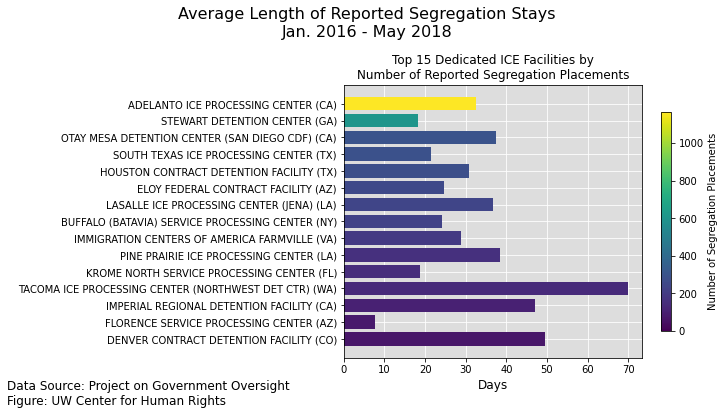

In [131]:
target = data.loc['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)']

fig, ax = plt.subplots(figsize=(10,5))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.grid(color='#FFFFFF')

y_pos = np.arange(len(data))

plt.barh(y_pos, data['mean'], align='center', color=cm.viridis((data['count']/data['count'].max())))

plt.yticks(y_pos, data.index)

plt.xlabel('Days', fontsize=12)

title = 'Average Length of Reported Segregation Stays\nJan. 2016 - May 2018'

plt.suptitle(title, fontsize=16, y = 1.1)
plt.title('Top 15 Dedicated ICE Facilities by\nNumber of Reported Segregation Placements')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin = 0, vmax=data['count'].max()))
sm._A = []
plt.colorbar(sm, shrink=.8, label='Number of Segregation Placements')

txt='Data Source: Project on Government Oversight\nFigure: UW Center for Human Rights'
plt.figtext(0, 0, txt, wrap=True, horizontalalignment='left', fontsize=12)

plt.tight_layout()
plt.show();

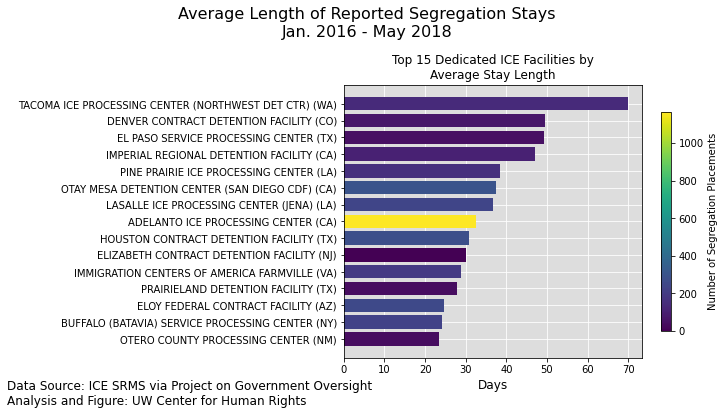

In [132]:
data = pogo[pogo['detloc'].isin(dedicated)]

data = data.groupby('facility')['days_solitary'].describe().sort_values(by='mean', ascending=False).head(15)

data = data.sort_values(by='mean')

target = data.loc['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)']

fig, ax = plt.subplots(figsize=(10,5))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.grid(color='#FFFFFF')

y_pos = np.arange(len(data))

plt.barh(y_pos, data['mean'], align='center', color=cm.viridis((data['count']/data['count'].max())))

plt.yticks(y_pos, data.index)

plt.xlabel('Days', fontsize=12)

title = 'Average Length of Reported Segregation Stays\nJan. 2016 - May 2018'

plt.suptitle(title, fontsize=16, y = 1.1)
plt.title('Top 15 Dedicated ICE Facilities by\nAverage Stay Length')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin = 0, vmax=data['count'].max()))
sm._A = []
plt.colorbar(sm, shrink=.8, label='Number of Segregation Placements')

txt='Data Source: ICE SRMS via Project on Government Oversight\nAnalysis and Figure: UW Center for Human Rights'
plt.figtext(0, 0, txt, wrap=True, horizontalalignment='left', fontsize=12)

plt.tight_layout()
plt.show();

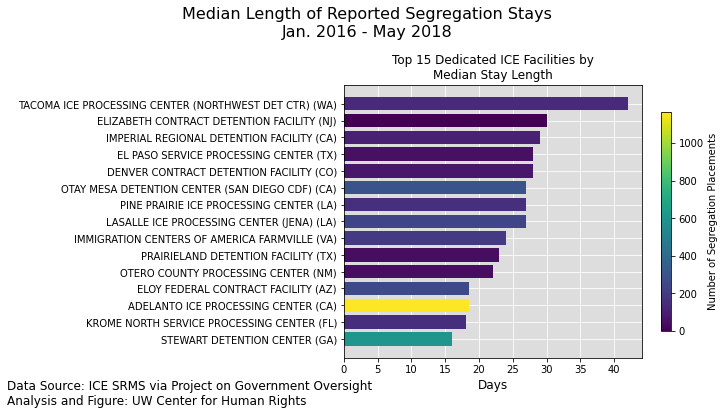

In [133]:
data = pogo[pogo['detloc'].isin(dedicated)]

data = data.groupby('facility')['days_solitary'].describe().sort_values(by='50%', ascending=False).head(15)

data = data.sort_values(by='50%')

target = data.loc['TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)']

fig, ax = plt.subplots(figsize=(10,5))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.grid(color='#FFFFFF')

y_pos = np.arange(len(data))

plt.barh(y_pos, data['50%'], align='center', color=cm.viridis((data['count']/data['count'].max())))

plt.yticks(y_pos, data.index)

plt.xlabel('Days', fontsize=12)

title = 'Median Length of Reported Segregation Stays\nJan. 2016 - May 2018'

plt.suptitle(title, fontsize=16, y = 1.1)
plt.title('Top 15 Dedicated ICE Facilities by\nMedian Stay Length')

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin = 0, vmax=data['count'].max()))
sm._A = []
plt.colorbar(sm, shrink=.8, label='Number of Segregation Placements')

txt='Data Source: ICE SRMS via Project on Government Oversight\nAnalysis and Figure: UW Center for Human Rights'
plt.figtext(0, 0, txt, wrap=True, horizontalalignment='left', fontsize=12)

plt.tight_layout()
plt.show();

In [134]:
data = pogo[pogo['detloc'].isin(dedicated)]

data = data.groupby('facility')['days_solitary'].describe().sort_values(by='mean', ascending=False)

In [135]:
data.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
facility,,,,,,,,
TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA),139.0,69.884892,72.575506,2.0,22.50,42.0,94.50,391.0
DENVER CONTRACT DETENTION FACILITY (CO),69.0,49.623188,57.117295,12.0,21.00,28.0,55.00,303.0
EL PASO SERVICE PROCESSING CENTER (TX),48.0,49.270833,50.361561,6.0,19.00,28.0,61.75,242.0
IMPERIAL REGIONAL DETENTION FACILITY (CA),108.0,47.037037,58.310950,14.0,23.75,29.0,47.00,466.0
PINE PRAIRIE ICE PROCESSING CENTER (LA),162.0,38.512346,29.523385,5.0,20.00,27.0,44.75,162.0
OTAY MESA DETENTION CENTER (SAN DIEGO CDF) (CA),297.0,37.430976,39.726040,2.0,20.00,27.0,43.00,534.0
LASALLE ICE PROCESSING CENTER (JENA) (LA),239.0,36.778243,37.060888,3.0,19.00,27.0,39.50,271.0
ADELANTO ICE PROCESSING CENTER (CA),1166.0,32.626072,48.993535,0.0,6.00,18.5,36.00,454.0
HOUSTON CONTRACT DETENTION FACILITY (TX),280.0,30.875000,48.183737,0.0,6.00,15.5,28.00,325.0


In [136]:
nwdc_avg = data.sort_values(by='mean', ascending=False).reset_index().loc[0, 'mean']
denv_avg = data.sort_values(by='mean', ascending=False).reset_index().loc[1, 'mean']

In [137]:
(nwdc_avg - denv_avg) / nwdc_avg * 100

28.99296697132183

In [138]:
data = pogo.groupby('facility')['days_solitary'].describe().sort_values(by='count', ascending=False)

In [139]:
# data.index

In [140]:
to_label = data.head(15).index

In [141]:
pos = range(1250, 0, -75)

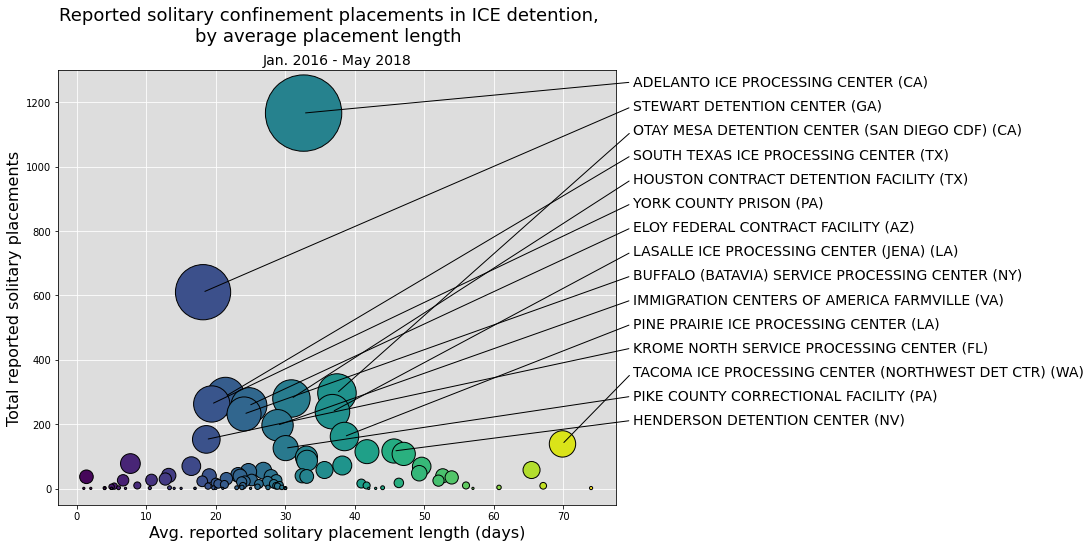

In [142]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.grid(color='#FFFFFF')

fig = plt.scatter(data['mean'], data['count'], s=data['count']*5,
                  color=cm.viridis((data['mean']/data['mean'].max())),
                  edgecolor={'#000000'})
ax.set_ylim(-50,1300)

for i, txt in enumerate(to_label):
    x = data.loc[txt, 'mean']
    y = data.loc[txt, 'count']
    plt.annotate(txt, (x, y), xytext=(80, pos[i]),
                 fontsize=14,
                 arrowprops={'arrowstyle': '-', 'relpos': (.0,.5)},
                 annotation_clip=False)

plt.xlabel('Avg. reported solitary placement length (days)', fontsize=16)
plt.ylabel('Total reported solitary placements', fontsize=16)
plt.suptitle('Reported solitary confinement placements in ICE detention,\nby average placement length', y=.99, fontsize=18)
plt.title('Jan. 2016 - May 2018', fontsize=14)

plt.show();